## Peligro por lluvia acumulada en la alcaldía Álvaro Obregón

En este notebook se realizará un análisis exploratorio de los datos de "peligro por lluvia acumulada" en la alcaldía Álvaro Obregón, Ciudad de México. Los datos fueron obtenidos del Atlas de Riesgo de la Ciudad de México. 

Fuente: https://www.atlas.cdmx.gob.mx/datosabiertos2.html

In [1]:
# Importamos las librerías necesarias
import geopandas as gpd

In [2]:
# Cargamos el geojson
gdf = gpd.read_file('data/alvaro_obregon/peligro_por_lluvia_acumulada.geojson')

# Ver las primeras filas
print(gdf.head())

# Ver información general
print(gdf.info())

# Ver el sistema de coordenadas (CRS)
print(gdf.crs)

   objectid  id            fenomeno taxonomia  r_p_v_e intensidad  \
0         1   1  Hidrometeorológico   Lluvias  Peligro       Bajo   
1         2   2  Hidrometeorológico   Lluvias  Peligro       Bajo   
2         3   3  Hidrometeorológico   Lluvias  Peligro       Bajo   
3         7   7  Hidrometeorológico   Lluvias  Peligro       Alto   
4         4   4  Hidrometeorológico   Lluvias  Peligro      Medio   

                     descripcio  \
0  Lluvia acumulada (isoyetas).   
1  Lluvia acumulada (isoyetas).   
2  Lluvia acumulada (isoyetas).   
3  Lluvia acumulada (isoyetas).   
4  Lluvia acumulada (isoyetas).   

                                            detalles  \
0  780 A 800 mm de Lamina de Lluvia Acumulada Anu...   
1  800 A 850 mm de Lamina de Lluvia Acumulada Anu...   
2  850 A 900 mm de Lamina de Lluvia Acumulada Anu...   
3  1050 A 1100 mm de Lamina de Lluvia Acumulada A...   
4  900 A 950 mm de Lamina de Lluvia Acumulada Anu...   

                                     

### Inspección de los datos espaciales
A continuación, se realizará una inspección de los datos espaciales para identificar los tipos de geometrías presentes en el archivo geojson.

In [3]:
print(gdf.geom_type.value_counts())

Polygon         4
MultiPolygon    3
Name: count, dtype: int64


### Resumen estadístico de los datos

A continuación, se realizará un resumen estadístico de los datos no espaciales. El detalle de cada evento reportado se encuentra en la columna "detalles". Se observa que el año en que se reportó el evento se encuentra en la columna "magni_num".

In [4]:
# Analizarla columna "detalles" para ver cuantos valores únicos tiene
print(gdf["intensidad"].value_counts())

intensidad
Bajo     3
Alto     2
Medio    2
Name: count, dtype: int64


In [10]:
# Lluvia acumulada por mm
print(gdf["magni_num"].value_counts())

magni_num
800     1
850     1
900     1
1100    1
950     1
1000    1
1050    1
Name: count, dtype: int64


In [6]:
# Ver los datos faltantes
print(gdf.isnull().sum())


objectid      0
id            0
fenomeno      0
taxonomia     0
r_p_v_e       0
intensidad    0
descripcio    0
detalles      0
fuente        0
magni_uni     0
magni_num     0
cve_mun       0
alcaldia      0
entidad       0
area_m2       0
perime_m      0
geometry      0
dtype: int64


### Visualización inicial de los datos
A continuación, se realizará una visualización espacial inicial de los datos. Se observa como los polígonos representan las zonas de peligro por laderas inestables en la alcaldía Álvaro Obregón.

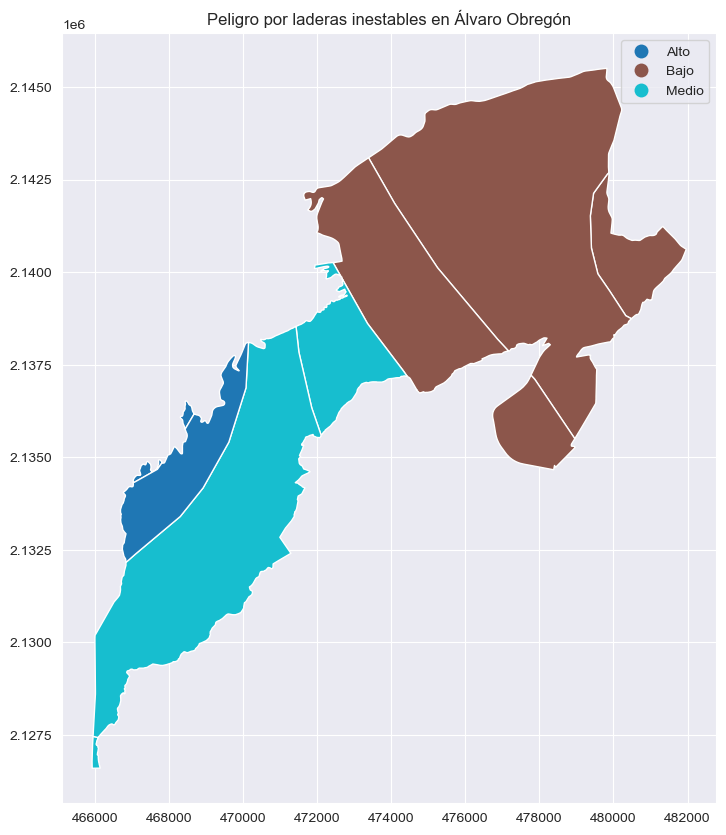

In [8]:
import matplotlib.pyplot as plt

# Visualizar los datos por intensidad
gdf.plot(column='intensidad', legend=True, figsize=(10, 10))
plt.title('Peligro por laderas inestables en Álvaro Obregón')
plt.show()
